# Continuous Latent Variable Models - PCA and FA

### Preliminaries

- Goal 
  - Introduction to Linear Latent Variable Models on continuous domains, specifically **factor analysis** and **principal component analysis**
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 570-573, 577-580, 584-586 (PCA and FA)
    - M. Tipping and C. Bishop, [Probabilistic Principal Component Analysis](./files/bishop-ppca-jrss.pdf), Journal of the Royal Statistical Society. Series B, Vol.61, No.3, 1999 

###  Continuous Latent Variable Models

-  (Recall that) mixture models use a discrete class variable.

-  Sometimes, it is more appropriate to think in terms of **continuous**
underlying causes (factors) that control the observed data.

  -  E.g., observe test results for subjects: English, Spanish and French

$$\begin{align*}
  \underbrace{ \begin{bmatrix} x_1\;(=\text{English})\\ x_2\;(=\text{Spanish})\\ x_3\;(=\text{French}) \end{bmatrix} }_{\text{observed}}% &= f(\text{causes},\theta) + \text{noise}\\
&= \begin{bmatrix} \lambda_{11},\lambda_{12}\\ \lambda_{21},\lambda_{22}\\ \lambda_{31},\lambda_{32}\end{bmatrix} \cdot \underbrace{ \begin{bmatrix} z_1\;(=\text{literacy})\\ z_2\;(=\text{intelligence})\end{bmatrix} }_{\text{causes}} +    \underbrace{\begin{bmatrix} v_1\\v_2\\v_3\end{bmatrix} }_{\text{noise}}
\end{align*}$$

- (**Unsupervised Regression**). This is like (linear) regression with unobserved inputs.

###  Dimensionality Reduction

-  If the dimension for the hidden 'causes' ($z$) is smaller than for the observed data ($x$), then the model (tries to) achieve **dimensionality reduction**.

-  Key applications include 
  1. **compression** (store $z$ rather than $x$) 
    - Compression through **real-valued** latent variables can be far more efficient than with discrete clusters.
    - E.g., with two 8-bit hidden factors, one can describe $2^{16}\approx 10^5$ settings; this would take $2^{16}$ clusters!
  2. **noise reduction** (e.g. in biomedical, financial or speech signals)
  3. **feature extraction** (e.g. as a pre-processor for classification) 
  4. **visualization** (particularly if $\mathrm{dim}(Z)=2$)  

### <span class="exercise">Example Problem: Visualization with missing data</span>


- <span class="exercise">We consider 38 examples from the 18-dimensional data set from the
**Tobamovirus** data set, see section 4.1 in <a href="./files/bishop-ppca-jrss.pdf">Tipping and Bishop (1999)</a> (Originally from <a href="https://www.stats.ox.ac.uk/pub/PRNN/">Ripley (1996)</a>).</span> 

- <span class="exercise">We will visualize this data set after projection onto the two principal axes (i.e., axes that explain largest data variance). </span> 

- <span class="exercise">We will also consider the visualization problem when <b>20% of the data set is missing</b>. </span> 

In [87]:
include("scripts/pca_demo_helpers.jl")
X = readDataSet("datasets/virus3.dat")

38×18 Array{Int64,2}:
 17  13  14  16   4  9  14  1  13  0  11  13  5   7  1  4  11  5
 12  11   9  12   6  5  12  1   9  1   7  12  5   6  0  4   8  2
 18  16  16  16   8  6  14  1  14  0   9  12  4   8  0  2  11  3
 18  16  15  19   8  6  11  1  15  1   7  13  5   8  0  2   9  3
 17  13  13  22   8  4  18  1  10  3   8  11  7   6  1  2  10  2
 16  13  16  21   9  3  17  1  10  4   7  12  7   5  1  2  11  3
 22  19  10  16  10  4  18  1  12  2   8  11  6   8  0  1   8  2
 20  10  24  10   6  9  21  0   7  0   7  18  4   9  1  4   8  2
 20  21  12  15   9  7  11  1   9  3   8  14  6   7  0  1  10  3
 20  21  12  15   9  7  11  1   9  3   9  14  5   7  0  1  10  3
 18  11  24  10   9  6  19  0  12  0   7  14  4  11  0  4   9  1
 20  12  23  10   8  5  20  0  13  0   6  13  4  11  0  4  10  1
 18  19  18  16   8  4  12  0  12  0  10  15  8   6  1  1  12  1
  ⋮                  ⋮                 ⋮                ⋮       
 17  12  22  10   8  5  18  0  14  0   5  13  4  10  0  3   9  1
 17

###  Model Specification for LC-LVM

- In this lesson, we focus on _Linear_ Continuous Latent Variable Models (**LC-LVM**).  

-  Introduce observation vector ${x}\in\mathbb{R}^D$ and $M$-dimensional (with $M \lt D$) real-valued **latent factor**  $z$:
$$\begin{align*}
  x &= W z + \mu + \epsilon \\
  z &\sim \mathcal{N}(0,I) \\
  \epsilon &\sim \mathcal{N}(0,\Psi)
\end{align*}$$
or equivalently
$$\begin{align*}
p(x|z) &= \mathcal{N}(x|\,W z + \mu,\Psi) \tag{likelihood}\\
p(z) &= \mathcal{N}(z|\,0,I) \tag{prior}
\end{align*}$$

- $W$ is the so-called $(D\times M)$-dim **factor loading matrix**. The parameters of this model are given by $\theta=\{W,\mu,\Psi\}$. 

- For interesting models, the **observation noise covariance matrix** $\Psi$ is always **diagonal**. 

<!--- - Note also that the components of the hidden variables $Z$ are statistically **uncorrelated** to each other (since the covariance matrix is diagonal); the components of the observed vector $X$ may be correlated.
--->

- Note the similarity of the likelihood function in LC-LVM and [linear regression](http://nbviewer.ipython.org/github/bertdv/AIP-5SSB0/blob/master/lessons/06_linear_regression/Linear-Regression.ipynb): 
$$p(y|x) = \mathcal{N}(y|\theta^T {x}, \sigma^2)$$

<!--- - In linear regression, we were not interested in modelling the inputs since they were observed. In latent variable models, they are not observed and we consider them hidden (latent) variables in the model. 
--->

###  LC-LVM Analysis (1): The marginal distribution $p({x})$

-  Since the product of Gaussians is Gaussian, both the joint $p(x,z) = p(x|z)p(z)$, the marginal $p(x)$ and the conditional
$p(z|x)$ distributions are also Gaussian.

- The marginal distribution for the observed data is
$$
\boxed{ p(x) = \mathcal{N}({x}|\,{\mu},W W^T + \Psi) } 
$$
since the **mean** evaluates to 
$$\begin{align*}
\mathrm{E}[x] &= \mathrm{E}[W z + \mu+ \epsilon] \\
 &= W \mathrm{E}[z] + \mu + \mathrm{E}[\epsilon] \\
 &= \mu 
\end{align*}$$
and the **covariance** matrix is
$$\begin{align*}
\mathrm{cov}[x] &= \mathrm{E}[({x}-{\mu})({x}-{\mu})^T] \\
  &=  \mathrm{E}[(W z +\epsilon)(W z +\epsilon)^T] \\
   &= W \mathrm{E}[z z^T] W^T + \mathrm{E}[\epsilon \epsilon^T] \\
   &= W W^T + \Psi 
\end{align*}$$

- $\Rightarrow$ **LC-LVM is just a MultiVariate Gaussian (MVG) model** $x \sim \mathcal{N}({\mu},\Sigma)$ with the restriction that

$$\Sigma= W W^T + \Psi \,.$$

### The Covariance Matrix of $p(x)$ is of Intermediate Complexity

-  The effective covariance $\mathrm{cov}[x] = W W^T + \Psi$ is the low-rank outer product of two
long skinny matrices plus a diagonal matrix.

<img src="./figures/fig-FA-eq1.png" width="400px">

- $\Rightarrow$ LC-LVM provides a MVG model of **intermediate complexity**. Compare the number of free parameters:
  - $D(D+1)/2$ for full Gaussian covariance $\Sigma$
  - $D(M+1)$  for LC-LVM model where $\Sigma = W W^T + \Psi$. 
  - $D$ for diagonal Gaussian covariance $\Sigma = \mathrm{diag}(\sigma_i^2)$
  - $1$ for isotropic Gaussian noise $\Sigma = \sigma^2 \mathrm{I}$
 


    

###  LC-LVM Analysis (2): The Factor Loading Matrix $W$ is Not Unique

-  The factor loading matrix $W$ can only be estimated up to a rotation matrix $R$. Namely, if we rotate $W \rightarrow WR $, then the covariance matrix for observations $x$ does not change (N.B.: a rotation (or orthogonal) matrix $R$ is a matrix such that $R^TR = R R^T = I$):

$$
W R (W R)^T + \Psi = W R R^T W^T + \Psi = W W^T + \Psi
$$

- $\Rightarrow$ Two persons that estimate ML parameters for FA on the same data are **not guaranteed to find the same parameters**, since any rotation of $W$ is equally likely.

- $\Rightarrow$ we can infer latent **subspaces** rather than individual components. One has to be careful when interpreting the numerical values of $W$ and $z$.

###  LC-LVM analysis (3): Constraints on the Noise Variance $\Psi$

-  When doing ML estimation for the parameters, a trivial solution for the covariance matrix $\Sigma_x = W W^T + \Psi$ is setting $\hat W=0$ and $\hat\Psi$ equal to the sample variance of the data.

-  In this case, all data correlation is explained as noise. (We'd like to avoid this.)  

- $\Rightarrow$ The LC-LVM model is uninteresting without some restriction on the observation noise covariance matrix $\Psi$. 

- The interesting cases are mostly for diagonal $\Psi$. Note that if $\Psi$ is diagonal, all correlations between the $(D)$ components of $x$ **must be explained** by the rank-$M$ matrix $W W^T$. Three model choices are common:

##### 1. Factor Anaysis 

- In Factor Analysis (**FA**), $\Psi$ is restricted to be _diagonal_:

$$\begin{align*} 
\Psi = \mathrm{diag}(\psi_i) 
\end{align*}$$

###  LC-LVM analysis (3): Constraints on the Noise Variance $\Psi$, cont'd


##### 2. Probabilistic Principal Component Analysis 

- In Probabilistic Principal Component Analysis (**pPCA**), the variances are further restricted to be the same,
 
$$\begin{align*} 
\Psi = \sigma^2 I 
\end{align*}$$

##### 3. Principal Component Analysis 

- The 'regular' (deterministic) Principal Component Analysis (**PCA**) procedure can be obtained by further requiring that
$$\begin{align*} 
\Psi &= \lim_{\sigma^2\rightarrow 0} \sigma^2 I \\
W^T W &= I
\end{align*}$$ 
i.e., the noise model is discarded altogether and the columns of $W$ are orthonormal. 

- Regular PCA is a well-known deterministic procedure for dimensionality reduction (that predates pPCA).

<span style="color:red">$\Rightarrow$ FA, pPCA and PCA differ only by their model for the noise variance $\Psi$ (namely, diagonal, isotropic and 'zeros').</span>

###  Typical Applications
-  In PCA (or pPCA), the noise variance is assumed to be the same for all components. This is appropriate if all components of the observed data are 'shifted' versions of each other.

$\Rightarrow$ **PCA is very widely applied to image and signal processing tasks!**

-  Google (May-2015): [PCA "face recognition"] $>$ 300K hits; [PCA "noise reduction"] $>$ 100K hits 

-  FA is insensitive to scaling of individual components in the observed data (see appendix).
-  Use FA if the data are not shifted versions of the same kind.

$\Rightarrow$ **FA has strong history in 'social sciences'**

###  ML estimation for pPCA Model

- Given the generative model for pPCA 
$$\begin{align*}
p(x_n|z_n) &= \mathcal{N}(x_n\mid W z_n + \mu,\sigma^2 \mathrm{I})\\
p(z_n) &= \mathcal{N}(z_n \mid0,\mathrm{I})
\end{align*}$$
and observations ${D}=\{x_1,\dotsc,x_N\}$, find ML estimates for the parameters $\theta=\{W,\mu,\sigma\}$ 

- **Inference for ${\mu}$** is easy: ${x}$ is a multivariate Gaussian with mean ${\mu}$, so its ML estimate is
$$ \hat {\mu} = \frac{1}{N}\sum_n {x}_n$$
Now subtract $\hat {\mu}$ from all data points (${x}_n:= {x}_n-\hat {\mu}$) and assume that we have zero-mean data.

- For ML estimation of $W$ and $\sigma^2$, both gradient-ascent and EM are possible. 

### Solution method 1: Gradient-ascent on the log-likelihood 

- Work out the gradients for the log-likelihood
$$\begin{align*}\log\, &p({D}|{\theta}) \\ &= -\frac{N}{2} \log \lvert 2\pi(W W^T + \sigma^2 \mathrm{I})\rvert  -\frac{1}{2}\sum_n {x}_n^T(W W^T + \sigma^2 \mathrm{I})^{-1}{x}_n\end{align*}$$
and optimize w.r.t. $W$ and $\sigma^2$. 

- (Similarly to ML estimation in Gaussian mixture models), it turns out to be quite difficult to work out the gradient because of the coupling between $W$ and $\sigma^2$ (but it is possible, see [Tipping and Bishop, 1999](./files/bishop-ppca-jrss.pdf)).

### Solution method 2: Use EM

- A big bonus for EM over gradient-based methods is that EM comfortably handles missing observations, e.g. through sensor malfunction. Missing observations are simply treated as hidden variables. 

- Maximizing the _expected complete-data log-likelihood_ leads to the following  (see Bishop, pg.578 for derivation): 

$$\begin{align*}
\textbf{E-step}:& \\
M &= W^T W + \sigma^2 \mathrm{I}\\
\mathrm{E}\left[ z_n\right] &= M^{-1} W^T x_n \\
\mathrm{E}\left[ z_n z_n^T\right] &= \sigma^2 M^{-1} +  \mathrm{E}\left[ z_n\right] \mathrm{E}\left[ z_n\right]^T\\
\\
\textbf{M-step}:& \\
W_{\text{new}} &= \left[ \sum_{n=1}^N x_n \mathrm{E}\left[z_n\right]^T\right] \left[ \sum_{n=1}^N \mathrm{E}\left[ z_n z_n^T\right]\right]^{-1} \\
\sigma^2_{\text{new}} &= \frac{1}{ND} \sum_{n=1}^N \left\{ x_n^T x_n - 2 \mathrm{E}\left[z_n\right]^T W_{\text{new}}^T x_n + \mathrm{Tr}\left( \mathrm{E}\left[ z_n z_n^T\right] W_{\text{new}}^T W_{\text{new}} \right) \right\}
\end{align*}$$

### Solution method 2: Use EM, cont'd

- Note that after $x_n$ is observed, the unobserved 'input' $z_n$ is not known exactly; the uncertainty about input $z_n$, as expressed by the covariance $$\text{cov}(z_n) = \mathrm{E}\left[ z_n z_n^T\right] - \mathrm{E}\left[ z_n\right] \mathrm{E}\left[ z_n\right] ^T = \sigma^2 M^{-1}$$ can be computed _before the data point $x_n$ has been seen_. 
  - <span class="exercise">Exercise: Show that the precision about $z_n$ increases through observing $x_n.$</span>
  - Compare this to linear regression, where we have full knowledge about an input-output pair.

- If there was no uncertainty about $z_n$, i.e., $\mathrm{E}\left[ z_n\right] = z_n$ and $\mathrm{E}\left[ z_n z_n^T\right] = z_n z_n^T$, then
$$
W_{\text{new}} = \left[ \sum_{n=1}^N x_n z_n^T\right] \left[ \sum_{n=1}^N  z_n z_n^T\right]^{-1}
$$
  - <span class="exercise">Exercise: Verify that this solution resembles the [ML solution for linear regression](http://nbviewer.ipython.org/github/bertdv/AIP-5SSB0/blob/master/lessons/notebooks/06_Linear-Regression.ipynb).</span>  

### <span class="exercise">Example Problem Revisited</span>

Let's perform pPCA on the example (**Tobamovirus**) data set using EM. We'll find the two principal components ($M=2$), and then visualize the data in a 2-D plot. The implementation is quite straightforward, have a look at the [source file](https://github.com/bertdv/AIP-5SSB0/blob/master/lessons/notebooks/scripts/pca_demo_helpers.jl) if you're interested in the details.

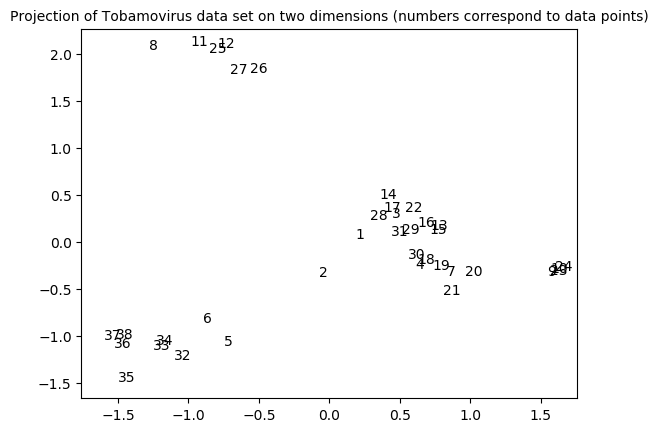

In [88]:
using LinearAlgebra
include("scripts/pca_demo_helpers.jl")
X = readDataSet("datasets/virus3.dat")
(θ, Z) = pPCA(convert(Matrix,X'), 2)# uses EM, implemented in scripts/pca_demo_helpers.jl. Feel free to try more/less dimensions.


using PyPlot
plot(Z[1,:], Z[2,:], "w")
for n=1:size(Z,2)
    PyPlot.text(Z[1,n], Z[2,n], string(n), fontsize=10) # put a label on the position of the data point
end
title("Projection of Tobamovirus data set on two dimensions (numbers correspond to data points)", fontsize=10);

<span class="exercise">Note that the solution is not unique, but the clusters should be more or less persistent.</span>

<span class="exercise">Now let's randomly remove 20% of the data:</span>

In [89]:
X_corrupt = convert(Matrix{Float64}, X)# convert to floating point matrix so we can use NaN to indicate missing values
indices = findall(rand(Float64,size(X)) .< 0.2)
X_corrupt[indices] .= NaN
println(X_corrupt)

[17.0 NaN 14.0 16.0 4.0 9.0 14.0 1.0 13.0 0.0 11.0 NaN 5.0 7.0 1.0 4.0 11.0 NaN; 12.0 11.0 9.0 12.0 6.0 NaN 12.0 1.0 9.0 1.0 NaN NaN 5.0 6.0 0.0 NaN 8.0 2.0; 18.0 NaN 16.0 16.0 8.0 NaN NaN NaN NaN 0.0 9.0 12.0 4.0 8.0 0.0 NaN 11.0 NaN; 18.0 16.0 NaN 19.0 8.0 6.0 11.0 1.0 15.0 NaN 7.0 13.0 5.0 8.0 0.0 2.0 9.0 NaN; 17.0 13.0 13.0 22.0 8.0 4.0 18.0 1.0 10.0 NaN 8.0 11.0 7.0 6.0 NaN 2.0 10.0 NaN; 16.0 13.0 NaN NaN NaN 3.0 17.0 NaN 10.0 4.0 NaN 12.0 7.0 5.0 1.0 2.0 NaN 3.0; 22.0 NaN 10.0 NaN NaN 4.0 NaN 1.0 12.0 2.0 8.0 11.0 6.0 8.0 0.0 1.0 8.0 2.0; 20.0 10.0 24.0 10.0 6.0 9.0 21.0 0.0 7.0 0.0 7.0 18.0 4.0 9.0 1.0 NaN 8.0 2.0; NaN 21.0 12.0 15.0 9.0 7.0 11.0 1.0 9.0 NaN 8.0 14.0 6.0 7.0 0.0 1.0 10.0 3.0; NaN 21.0 NaN 15.0 NaN 7.0 11.0 1.0 9.0 3.0 9.0 14.0 5.0 7.0 NaN 1.0 10.0 3.0; 18.0 NaN NaN 10.0 NaN 6.0 19.0 0.0 12.0 0.0 7.0 14.0 4.0 NaN 0.0 4.0 9.0 1.0; 20.0 12.0 23.0 10.0 8.0 NaN 20.0 0.0 13.0 0.0 6.0 13.0 4.0 11.0 0.0 NaN 10.0 1.0; 18.0 NaN 18.0 16.0 8.0 4.0 NaN 0.0 12.0 NaN 10.0 15.0

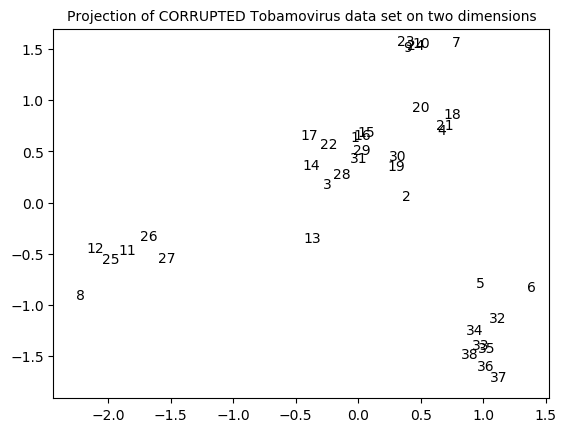

[-0.0621738, 0.349203, -0.28523, 0.632744, 0.944474, 1.3482, 0.745163, -2.25649, 0.361621, 0.436393, -1.91645, -2.17042, -0.4399, -0.442608, -0.00990082, -0.0385187, -0.464552, 0.682806, 0.231111, 0.42642, 0.621571, -0.305144, 0.310641, 0.391788, -2.05247, -1.74603, -1.59904, -0.20392, -0.0409722, 0.248351, -0.0666658, 1.04371, 0.909898, 0.858312, 0.953812, 0.949261, 1.0546, 0.821936]


In [93]:
(θ, Z) = pPCA(convert(Matrix,X_corrupt'), 2) # Perform pPCA on the corrupted data set
plot(Z[1,:], Z[2,:], "w")
for n=1:size(Z,2)
    PyPlot.text(Z[1,n], Z[2,n], string(n), fontsize=10) # put a label on the position of the data point
end
title("Projection of CORRUPTED Tobamovirus data set on two dimensions", fontsize=10);

<span class="exercise">As you can see, pPCA is quite robust in the face of missing data.</span>

-----
_The cell below loads the style file_



In [91]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->